## Image Processing: Manual Convolution with Gaussian and Laplacian Kernels

This notebook performs custom image convolution using mathematically defined Gaussian and Laplacian kernels. It uses **manual convolution operations** working in the **spatial domain** (directly with pixel values), rather than using built-in library functions.

### Functions:
- **imshow(title, image, size, show_pixels):** Displays the image with an option to print pixel values.
- **gaussian_kernel(size, sigma):** Creates a normalized Gaussian kernel based on size and standard deviation.
- **laplacian_kernel():** Returns a fixed Laplacian kernel for edge detection.
- **apply_convolution(image, kernel):** Converts image to grayscale and applies 2D convolution using the given kernel.

### Output:
- Pixel values of the original, blurred, and edge-detected images.
- Visualizations of original, Gaussian-blurred, and Laplacian edge-detected outputs.

### Kernel & Convolution

- A **kernel** is a small matrix used to filter an image (also called a filter mask).
- The process of applying it to an image is called **convolution**.
- Convolution is performed **around the center** of the kernel.
- Padding (e.g., **zero-padding**) is used to process border pixels and preserve image dimensions.

###  Gaussian Kernel
- Purpose: Noise reduction and smoothing.
- Linear filter using the Gaussian function.
- Manual 2D kernel creation and normalization.


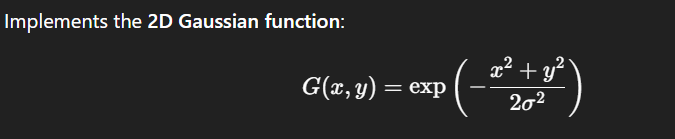

### Laplacian Kernel
- Purpose: Edge detection by highlighting regions of rapid intensity change.
- Linear filter detecting second-order derivatives.

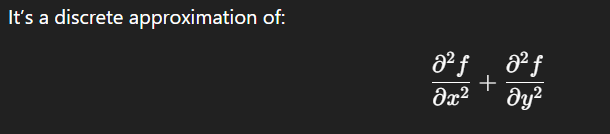

In [1]:
# imports

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(title="Image", image=None, size=10, show_pixels=False):
    """
    Displays an image with optional pixel values.

    Args:
        title (str): Title of the image window.
        image (np.array): The image to display.
        size (int): Size scaling factor for display.
        show_pixels (bool): If True, print pixel values.
    """
    if show_pixels:
        print(f"Pixel values for {title}:\n", image)

    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w / h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


def apply_convolution(image, kernel):
    """
    Applies a convolution operation between an image and a given kernel.

    Args:
        image (np.array): Input image (BGR).
        kernel (np.array): 2D convolution kernel.

    Returns:
        np.array: Convolved image.
    """

    # Padding to maintain original image size
    pad = kernel.shape[0] // 2  # half the kernel height, floor div
    padded_img = np.pad(image, pad_width=pad, mode='constant', constant_values=0) # 0 padding

    output = np.zeros_like(image) # an o/p image to store the convoluted values

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kernel.shape[0], j:j+kernel.shape[1]] # square from the padded image that matches the size of the kernel.
            output[i, j] = np.clip(np.sum(region * kernel), 0, 255)

    return output.astype(np.uint8) # 8 bit unsigned int, standard image format


def gaussian_kernel(size=3, sigma=1):
    """
    Generates a Gaussian kernel using mathematical formula.

    Args:
        size (int): Size of the kernel (should be odd).
        sigma (float): Standard deviation of the Gaussian distribution.

    Returns:
        np.array: Gaussian kernel.
    """
    ax = np.arange(-size//2 + 1., size//2 + 1.)
    xx, yy = np.meshgrid(ax, ax)  # 2D grid arrays of X and Y coordinates.
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)  # normalises the kernel, so sum of weights = 1


def laplacian_kernel():
    """
    Returns the Laplacian kernel for edge detection.

    Returns:
        np.array: Laplace kernel.
    """
    return np.array([[0, 1, 0],
                     [1,-4, 1],
                     [0, 1, 0]])


### Applying on a sample matrix

In [8]:
# 5x5 Matrix representing a binary
image = np.array([[176, 30, 1, 0, 56],
                  [100, 178, 60, 80, 230],
                  [100, 100, 0, 61, 100],
                  [100, 15, 100, 0, 0],
                  [50, 0, 200, 1, 0]], dtype=np.uint8)

# Generate kernels
gaussian = gaussian_kernel()
laplace = laplacian_kernel()

# Apply convolutions
blurred = apply_convolution(image, gaussian)
edges = apply_convolution(image, laplace)

print("Original Image (5x5):\n", image)
print("\nGaussian Kernel (3x3):\n", gaussian)
print("\nLaplacian Kernel (3x3):\n", laplace)
print("\nGaussian Blurred Output:\n", blurred)
print("\nLaplacian Edge Output:\n", edges)

Original Image (5x5):
 [[176  30   1   0  56]
 [100 178  60  80 230]
 [100 100   0  61 100]
 [100  15 100   0   0]
 [ 50   0 200   1   0]]

Gaussian Kernel (3x3):
 [[0.08 0.12 0.08]
 [0.12 0.2  0.12]
 [0.08 0.12 0.08]]

Laplacian Kernel (3x3):
 [[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]

Gaussian Blurred Output:
 [[65 62 30 38 45]
 [86 93 58 71 80]
 [72 83 60 64 62]
 [48 66 59 42 17]
 [23 47 54 32  0]]

Laplacian Edge Output:
 [[  0 235  86 137   6]
 [ 54   0  19  31   0]
 [  0   0 255   0   0]
 [  0 240   0 162 100]
 [  0 255   0 196   1]]


### Applying on an Image

Pixel values for Original:
 [[25 25 25 ... 23 23 23]
 [25 25 25 ... 23 23 23]
 [25 25 25 ... 24 24 24]
 ...
 [29 29 29 ... 29 29 29]
 [28 28 28 ... 28 28 28]
 [28 28 28 ... 28 28 28]]


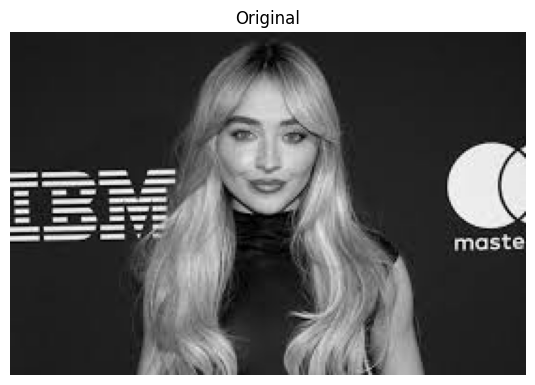

Pixel values for Gaussian Blur, 3x3 Kernel:
 [[13 18 18 ... 16 16 12]
 [18 24 24 ... 23 23 16]
 [18 24 24 ... 23 23 17]
 ...
 [20 28 28 ... 28 28 20]
 [20 28 28 ... 28 28 20]
 [14 20 20 ... 20 20 14]]


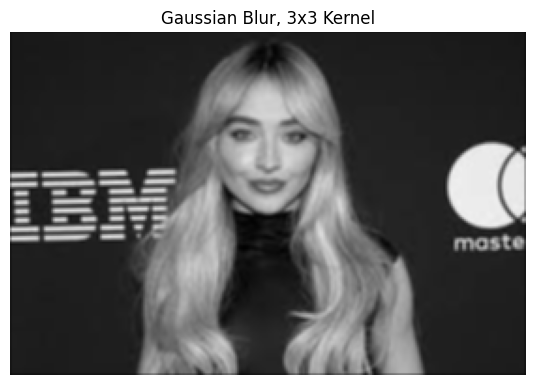

Pixel values for Gaussian Blur, 5x5 Kernel:
 [[12 16 17 ... 16 15 11]
 [16 22 23 ... 22 20 15]
 [17 23 25 ... 23 22 16]
 ...
 [20 27 28 ... 28 27 20]
 [18 25 26 ... 26 25 18]
 [13 18 19 ... 19 18 13]]


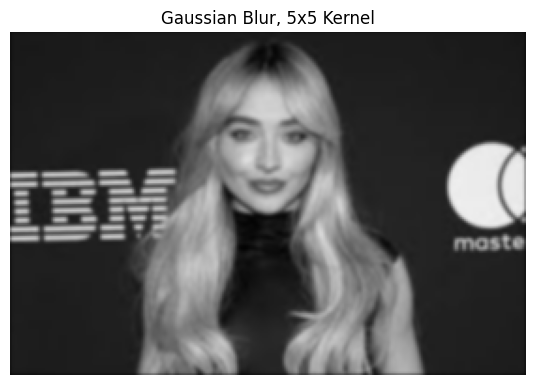

Pixel values for Laplace Transformation:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 2 1 0]
 [0 0 0 ... 0 0 0]]


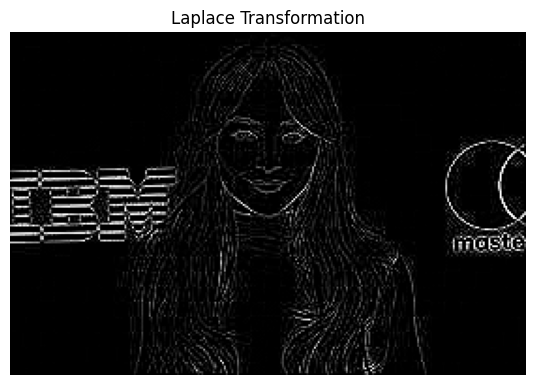

In [ ]:
# Load image
img = cv2.imread('sabrina.jpeg',0)

# Show original image and pixels
imshow("Original", img, show_pixels=True)

# Apply Gaussian blur, size 3 kernel
gauss_k = gaussian_kernel(size=3)
gauss_blur = apply_convolution(img, gauss_k)
imshow("Gaussian Blur, 3x3 Kernel",gauss_blur, show_pixels=True)

# Apply Gaussian blur, size 3 kernel
gauss_k = gaussian_kernel(size=5)
gauss_blur = apply_convolution(img, gauss_k)
imshow("Gaussian Blur, 5x5 Kernel",gauss_blur, show_pixels=True)

# Apply Laplacian edge detection
lap_k = laplacian_kernel()
laplace_img = apply_convolution(img, lap_k)
imshow("Laplace Transformation",laplace_img, show_pixels=True)